In [1]:
#install pytesseract in colab
!pip install pytesseract
!pip install Pillow==9.0.0


In [2]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


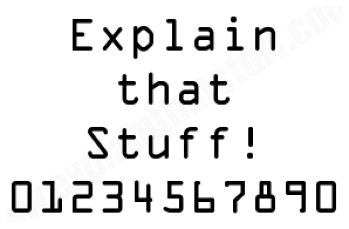

In [55]:
img = cv2.imread('img/original.png')

#convert the img to RGB since CV read it as BGR 
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

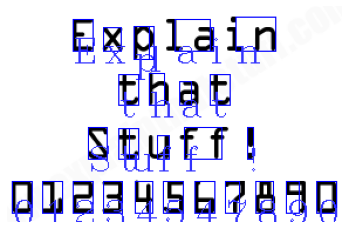

In [53]:
def box_char(img):
  #extract the image size data
  height ,width ,_= img.shape

  #get the boundary boxes data from pytesseract
  boxes = pytesseract.image_to_boxes(img)

  #extract each char data and put the box
  for box in boxes.splitlines() :
    box = box.split()
    # get the box data x,y,width,hight
    x,y,w,h=int(box[1]), int(box[2]), int(box[3]), int(box[4])
    #draw rectangle around the char we detect 
    cv2.rectangle(img,(x,height-y),(w,height-h),(0,0,255),1)
    #display the char we detect under the box, we add 10 to y so we can easily see it
    cv2.putText(img,box[0],(x,height-y + 10),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),1) 

  plt.imshow(img)
  plt.axis('off')
  plt.show()
box_char(img)

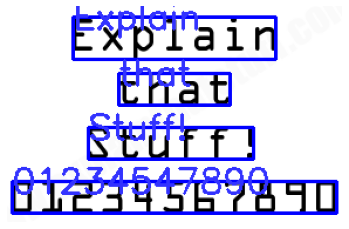

In [56]:
def box_word(img):
    height ,width ,_= img.shape
    boxes=pytesseract.image_to_data(img)

    for count,b in enumerate(boxes.splitlines()):
        if count!=0:
            b=b.split()
            if len(b)==12:
                x,y,w,h=int(b[6]) , int(b[7]),int(b[8])  , int(b[9])
                cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),2)
                cv2.putText(img,b[11],(x,y+10),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)

    plt.imshow(img)
    plt.axis('off')
    plt.show()
box_word(img)